Dependency

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

Load the dataset

In [95]:
df=pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [96]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [98]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Preprocessing the dataset

In [99]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Exploratory Data Analysis (EDA)

<Axes: >

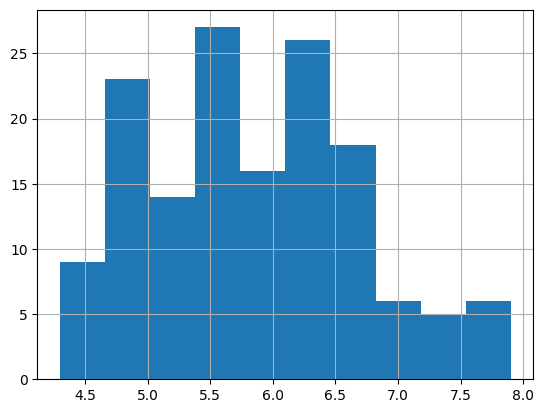

In [100]:
df['sepal_length'].hist()

<Axes: >

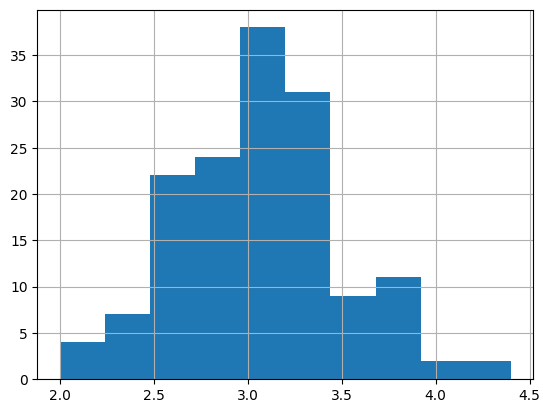

In [101]:
df['sepal_width'].hist()

<Axes: >

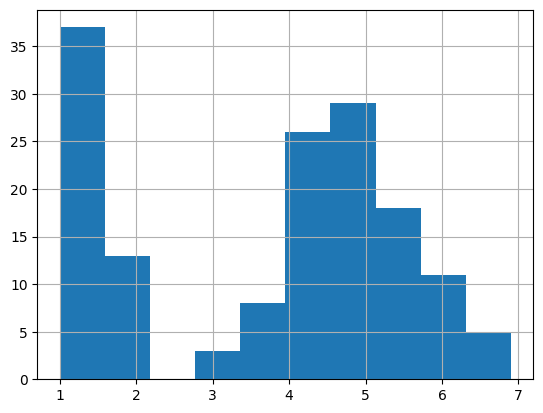

In [102]:
df['petal_length'].hist()

In [103]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [104]:
colours=['red', 'orange', 'blue']
species=['setosa', 'versicolor', 'virginica']

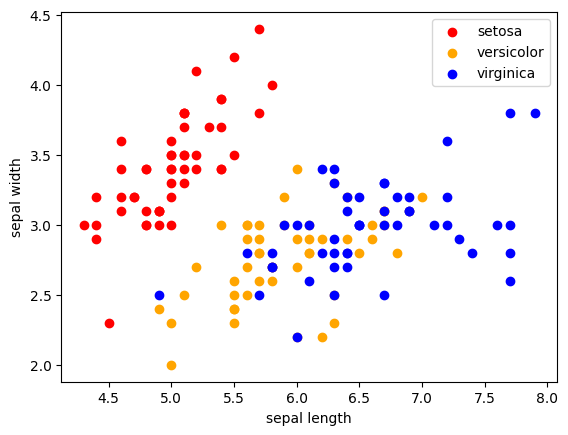

In [105]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'],c=colours[i], label=species[i])
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

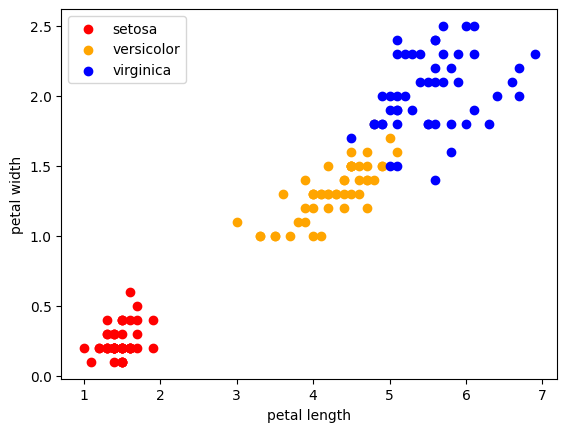

In [106]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['petal_length'], x['petal_width'],c=colours[i], label=species[i])
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()

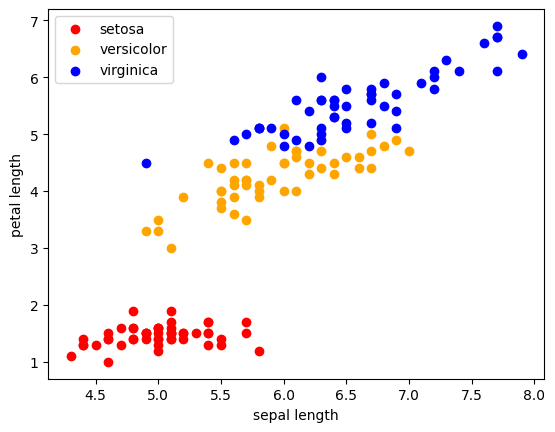

In [107]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal_length'], x['petal_length'],c=colours[i], label=species[i])
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend()

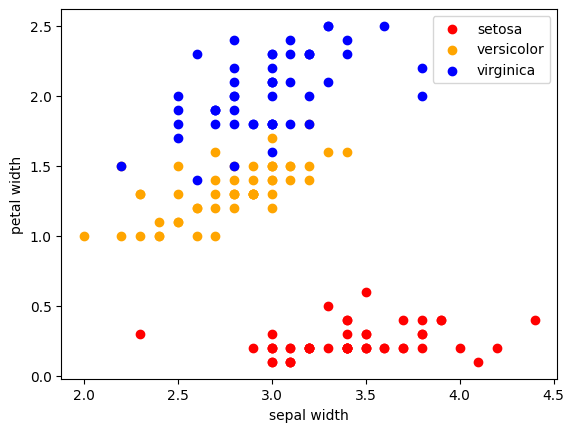

In [108]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal_width'], x['petal_width'],c=colours[i], label=species[i])
plt.xlabel('sepal width')
plt.ylabel('petal width')
plt.legend()

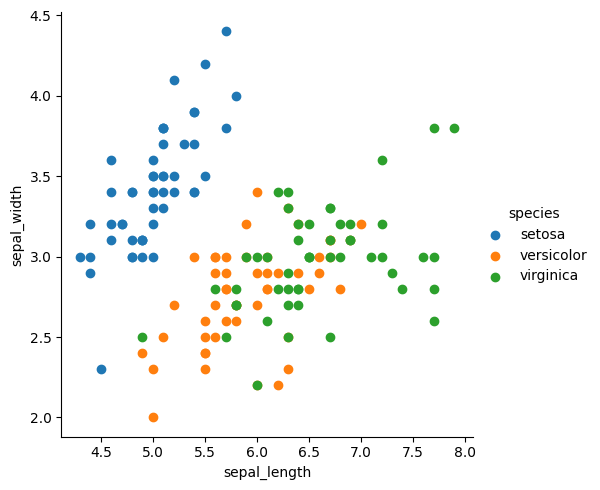

In [109]:
sns.FacetGrid(df, hue="species", height=5).map(plt.scatter, "sepal_length", "sepal_width").add_legend()

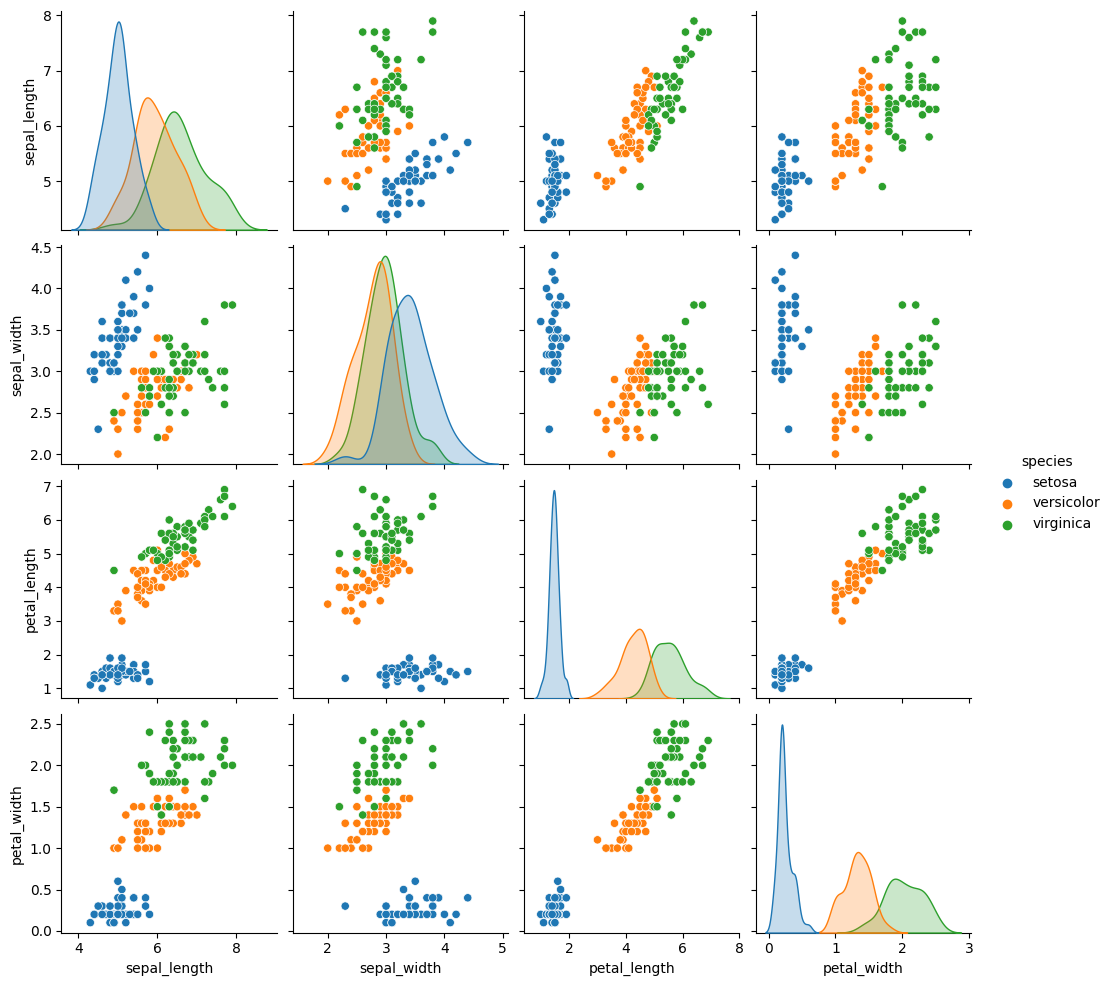

In [110]:
sns.pairplot(df.iloc[:,:],hue='species')

### Label Enconding
preprocessing technique, convert labels into numeric form for machine level understanding

In [111]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [112]:
# df['species']=le.fit_transform(df['species'])
# df.head(-5)

## Model Training

In [119]:
X = df.iloc[:, [0,1,2, 3]].values
y = df.iloc[:, 4].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [122]:
print('Train size: ', X_train.shape)
print('Test size: ', X_test.shape)

Train size:  (112, 4)
Test size:  (38, 4)


Feature Scaling

In [114]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

Apply Logisitic Regression

In [115]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Predicition

In [116]:
y_pred = model.predict(X_test)

In [117]:
probs_y=model.predict_proba(X_test)
probs_y=np.round(probs_y,2)

In [118]:
res = "{:<10} | {:<10} | {:<10} | {:<13} | {:<5}".format("y_test", "y_pred", "Setosa(%)", "versicolor(%)", "virginica(%)\n")
res += "-"*65+"\n"
res += "\n".join("{:<10} | {:<10} | {:<10} | {:<13} | {:<10}".format(x, y, a, b, c) for x, y, a, b, c in zip(y_test, y_pred, probs_y[:,0], probs_y[:,1], probs_y[:,2]))
res += "\n"+"-"*65+"\n"
print(res)

y_test     | y_pred     | Setosa(%)  | versicolor(%) | virginica(%)
-----------------------------------------------------------------
virginica  | virginica  | 0.0        | 0.03          | 0.97      
versicolor | versicolor | 0.01       | 0.95          | 0.04      
setosa     | setosa     | 1.0        | 0.0           | 0.0       
virginica  | virginica  | 0.0        | 0.08          | 0.92      
setosa     | setosa     | 0.98       | 0.02          | 0.0       
virginica  | virginica  | 0.0        | 0.01          | 0.99      
setosa     | setosa     | 0.98       | 0.02          | 0.0       
versicolor | versicolor | 0.01       | 0.71          | 0.28      
versicolor | versicolor | 0.0        | 0.73          | 0.27      
versicolor | versicolor | 0.02       | 0.89          | 0.08      
virginica  | virginica  | 0.0        | 0.44          | 0.56      
versicolor | versicolor | 0.02       | 0.76          | 0.22      
versicolor | versicolor | 0.01       | 0.85          | 0.13      
versicol

Comfusion Matrix

In [127]:
from sklearn.metrics import confusion_matrix

conf_mat=confusion_matrix(y_test, y_pred)
print(conf_mat)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [ ]:
axes = plt.axes()
df_cm = conf_mat
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", axes = axes )
axes.set_title('Confusion Matrix for test data')
plt.show()

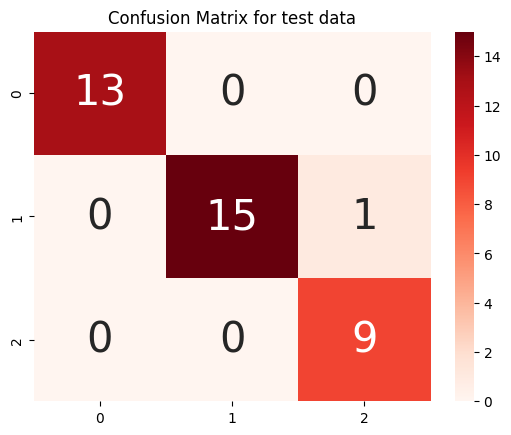

In [129]:
axes = plt.axes()
df_cm = conf_mat
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Reds", axes = axes )
axes.set_title('Confusion Matrix for test data')
plt.show()